<a href="https://colab.research.google.com/github/DaviRamos/EstudosPandas/blob/master/Estudos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dica 1: Preenchendo Valores NA**

A função fillna() é usada para preencher os valores ausentes. A função oferece muitas opções. Podemos usar um valor específico, uma função agregada (por exemplo, média) ou o valor anterior ou seguinte.
Para esse exemplo usaremos a moda, a estatística que representa o valor que aparece mais vezes em uma variável.


In [15]:
import pandas as pd


**Importar o dataset**


In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset6.csv")

## **Conhecendo o dataset**

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Preenchendo Valores NA**

In [20]:
moda = df['Quantity'].value_counts().index[0]
moda

3

**Então extraímos a moda da coluna Quantity**

In [21]:
#Acho essa forma mais intuitiva: 
moda_2 = df.Quantity.mode()[0]
moda_2

3

**E por fim preenchemos os valores NA com a moda**

In [23]:
df['Quantity'].fillna(value = moda, inplace = True)

O index[0] indica que queremos o primeiro resultado obtido pelo método value_counts(). 
O inplace = True indica que desejamos aplicar o método fillna() e salvar o resultado no próprio dataframe!


## **Dica 2: Query no Dataframe**

Com o Pandas criamos dataframes, que são essencialmente tabelas. Como tal, podemos fazer consultas, ou simplesmente queries. E para isso usamos o método query(). Veja o exemplo abaixo:

**Então checamos os valores mínimo e máximo da coluna Sales**

In [24]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

O intervalo de vendas (Sales) é de 0.44 a 22638. Vamos fazer uma consulta e retornar todas as vendas entre 10000 e 12000. Fazemos isso com a instrução abaixo:

**Geramos um novo dataframe apenas com o intervalo de vendas entre 10000 e 12000**


In [25]:
df2 = df.query('10000 < Sales < 12000')

##**Dica 3: Verificando a Ocorrência de Diversos Valores em Uma Coluna**

Em nosso conjunto de dados de exemplo, temos a coluna Quantity que representa a quantidade de itens vendidos em cada uma das vendas. Imagine que precisamos saber em quais vendas foram vendidos 5, 7, 9 ou 11 itens.

**Como aplicaríamos esse tipo de filtro ao nosso dataframe?**

Fácil. O Pandas oferece o método isin() para checar diversos valores em uma coluna. 

**Aplicando o filtro**

In [34]:
df[df['Quantity'].isin([5,7,9,11])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,9975,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-AR-10004752,Office Supplies,Art,Blackstonian Pencils,18.6900,7,0.00,5.2332
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000
9981,9982,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,Ohio,45014,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.5200,5,0.20,5.3690
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7,0.00,16.7132


Na instrução acima estamos filtrando o dataframe chamado df, retornando todas as linhas onde a coluna Quantity for igual aos valores 5, 7, 9 ou 11. Passamos uma lista de valores como argumento para o método isin().
Vamos deixar um pouquinho mais divertido. Se você executou a instrução acima, percebeu que foram retornadas 2.128 linhas. E se quisermos retornar somente 10 linhas? É só fatiar o resultado assim:


In [26]:
df[df['Quantity'].isin([5,7,9,11])][:10]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
21,22,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.4600,7,0.00,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7,0.00,15.6884
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.5440,7,0.20,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


## **Dica 4: Operadores Lógicos**

Os operadores lógicos são excelentes para filtrar dataframes e retornar exatamente os dados que precisamos para nosso trabalho. Para conhecer mais sobre as regras dos operadores lógicos, acesse aqui:

https://pt.wikipedia.org/wiki/Operador_l%C3%B3gico

E então usaremos o operador lógico AND para checar duas condições. Serão retornados os registros quando as duas condições forem verdadeiras.

**Filtrando as vendas que ocorreram para o segmento de Home Office e na região Sul**


In [27]:
df[(df.Segment == 'Home Office') & (df.Region == 'South')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
182,183,CA-2014-158274,2014-11-19,2014-11-24,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,71203,South,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,503.9600,4,0.00,131.0296
183,184,CA-2014-158274,2014-11-19,2014-11-24,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,71203,South,TEC-PH-10004896,Technology,Phones,Nokia Lumia 521 (T-Mobile),149.9500,5,0.00,41.9860
184,185,CA-2014-158274,2014-11-19,2014-11-24,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,71203,South,TEC-AC-10002345,Technology,Accessories,HP Standard 104 key PS/2 Keyboard,29.0000,2,0.00,7.2500
231,232,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.8600,2,0.45,-102.0480
232,233,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614,South,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,3,0.45,-248.2458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,9806,CA-2016-136322,2016-10-21,2016-10-26,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Fort Lauderdale,Florida,33311,South,FUR-FU-10002878,Furniture,Furnishings,"Seth Thomas 14"" Day/Date Wall Clock",45.5680,2,0.20,9.6832
9806,9807,CA-2016-136322,2016-10-21,2016-10-26,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Fort Lauderdale,Florida,33311,South,OFF-BI-10004817,Office Supplies,Binders,GBC Personal VeloBind Strips,28.7520,8,0.70,-21.0848
9960,9961,CA-2017-141446,2017-09-16,2017-09-18,Second Class,CL-12700,Craig Leslie,Home Office,United States,Florence,Kentucky,41042,South,TEC-AC-10002305,Technology,Accessories,KeyTronic E03601U1 - Keyboard - Beige,18.0000,1,0.00,3.2400
9970,9971,CA-2015-103772,2015-06-28,2015-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,Georgia,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.5600,2,0.00,54.9976


Mas pode ser necessário checar duas condições e retornar os registros se pelo menos uma for verdadeira.

Nesse caso usamos o operador OR, conforme abaixo.

Filtrando as vendas que ocorreram para o segmento de Home Office ou região Sul


In [28]:
df[(df.Segment == 'Home Office') | (df.Region == 'South')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.4720,14,0.20,153.1152
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470


O operador de negação é o contrário do primeiro exemplo.

**Filtrando as vendas que não ocorreram para o segmento de Home Office e nem na região Sul**


In [29]:
df[(df.Segment != 'Home Office') & (df.Region != 'South')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


## **Dica 5: Group By**

A função Pandas Groupby é uma função versátil de usar que ajuda a obter uma visão geral dos dados. Isso torna mais fácil explorar o conjunto de dados e revelar os relacionamentos entre as variáveis.

Faremos vários exemplos da função groupby. Vamos começar com um simples.

O código a seguir agrupará as linhas com base nas combinações segment/region/sales e nos dará a taxa média de vendas de cada grupo.

**Aplicamos o group by**

In [30]:
df[['Segment', 'Region', 'Sales']].groupby(['Segment', 'Region']).mean()

Sales
Segment     Region             
Consumer    Central  207.946728
            East     238.875539
            South    233.390180
            West     217.033955
Corporate   Central  234.763466
            East     228.516929
            South    238.992025
            West     235.265911
Home Office Central  208.248046
            East     253.911805
            South    272.996329
            West     239.442692

Na instrução acima, primeiro filtramos os dados extraindo 3 colunas: ['Segment', 'Region', 'Sales'].

Na sequência, agrupamos por duas colunas: ['Segment', 'Region']. E então calculamos a média para a coluna que ficou foram do group by, nesse caso a coluna Sales.

O comportamento do group by com Pandas é o mesmo observado na Linguagem SQL.


## **Dica 6: Agregação Múltipla com Group By**

Vamos explorar mais a função groupby() pois temos diversas opções de sumarização dos dados de forma simples. No exemplo de hoje uniremos a função groupby() com a função agg() para realiza agregação múltipla.

**Aplicamos o group by**

In [18]:
df[['Segment', 'Region', 'Sales']].groupby(['Segment', 'Region']).agg(['mean', 'std', 'count'])

Sales                   
                           mean          std count
Segment     Region                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

Na instrução acima, primeiro filtramos os dado
s extraindo 3 colunas: 
['Segment','Region','Sales'].
Na sequência, agrupamos por duas colunas: ['Segment','Region'].

E então agregamos os dados calculando a média, desvio padrão e contagem de elementos para a coluna que ficou fora do group by, nesse caso a coluna Sales.
A função agg() recebe como argumento uma lista de funções para agregação.


## **Dica 7: Agregação Múltipla em Múltiplas Colunas com Group By**

Não precisamos aplicar a mesma função a todas as colunas durante a agregação. Vamos passar um dicionário que indica quais funções devem ser aplicadas a quais colunas.

**Aplicamos o group by**


In [19]:
df[['Region', 'Sales', 'Quantity']].groupby(['Region']).agg({'Sales':'mean', 'Quantity':'sum'})

,Sales,Quantity
Region,,
Central,215.772661,8780
East,238.336110,10618
South,241.803645,6209
West,226.493233,12266


No exemplo acima primeiro filtramos o dataframe pelas colunas ['Region', 'Sales', 'Quantity'] e então agrupamos pela coluna 'Region'.

A agregação é feita nas colunas que não fizeram parte do group by, nesse caso 'Sales' e 'Quantity'.

Mas como queremos agregações diferentes passamos um dicionário com chave e valor, onde a chave é o nome da coluna e o valor o nome da função que queremos usar na agregação.

Ao final temos a média de vendas por região e a quantidade total vendida por região, tudo em uma mesma tabela de saída e com apenas uma linha de código.
Ao executar o código acima você percebe que os títulos das colunas são seus respectivos nomes. Como ajustamos isso com o Pandas? Na Dica 8 eu conto!


## **Dica 8: Renomear as Colunas Após Agregação em Múltiplas Colunas**

Na dica 7 vimos como agregar múltiplas colunas, mas o resultado mostra o nome das variáveis como nomes das colunas resultantes. No exemplo calculamos a média e o total, mas o título das colunas ficou como 'Sales' e 'Quantity', ou seja não sabemos dizer o que o resultado representa sem olhar o código que gerou o resultado.

Para resolver isso podemos renomar as colunas resultantes. Aqui como fazer:

**Aplicamos o group by e gravamos o resultado em outro dataframe**


In [31]:
df_agg = df[['Region', 'Sales', 'Quantity']].groupby(['Region']).agg({'Sales':'mean', 'Quantity':'sum'})

**E então renomeamos as colunas**

In [32]:
df_agg.rename(columns = {'Sales':'Media de Vendas', 'Quantity':'Quantidade Total Vendida'}, inplace = True)
df_agg

,Media de Vendas,Quantidade Total Vendida
Region,,
Central,215.772661,8780
East,238.336110,10618
South,241.803645,6209
West,226.493233,12266


**E então podemos filtrar o dataframe pelo novo nome das colunas.**

In [33]:
df_agg[df_agg['Media de Vendas'] > 220]

,Media de Vendas,Quantidade Total Vendida
Region,,
East,238.336110,10618
South,241.803645,6209
West,226.493233,12266


## **Dica 9: Rank das Linhas do Dataframe**

Imagine que você tenha um dataframe com a média de vendas por região e você quisesse saber quais foram as regiões com as 2 maiores médias de vendas. Como você resolveria isso?

Poderíamos ordenar a coluna e observar as linhas com os dois maiores valores para a coluna de média, mas qualquer coisa diferente disso seria trabalhoso.
Uma solução mais elegante seria criar um rank e depois filtrar o que quisermos por esse rank. E fazemos isso facilmente com Pandas.

Vamos reproduzir o que fizemos na dica 8 e seguir a partir daí

**Aplicamos o group by e gravamos o resultado em outro dataframe**


In [35]:
df_agg = df[['Region', 'Sales', 'Quantity']].groupby(['Region']).agg({'Sales':'mean', 'Quantity':'sum'})

**E então renomeamos as colunas**

In [36]:
df_agg.rename(columns = {'Sales':'Media de Vendas', 'Quantity':'Quantidade Total Vendida'}, inplace = True)

**Agora criamos a coluna rank que é o resultado do método rank que vai numerar os itens do maior para o menor**

In [37]:
df_agg['rank'] = df_agg['Media de Vendas'].rank(method = 'first', ascending = False).astype('int')

**Como queremos as duas maiores médias de vendas, queremos os itens de rank 1 e 2, ou o que tiver rank menor que 3**

In [27]:
df_agg[df_agg['rank'] < 3]

,Media de Vendas,Quantidade Total Vendida,rank
Region,,,
East,238.336110,10618,2
South,241.803645,6209,1


## **Dica 10: Estilo no Dataframe**

A dica de hoje parece simples, mas pode ser bastante útil. Você definiu seu dataframe, fez agregações e agora gostaria de marcar os itens em cada coluna com o maior valor. Isso mesmo, marcar! E com uma cor diferente.

Usamos o atributo style do dataframe, que possui uma série de métodos, entre eles o método highlight_max() que realça com uma cor diferente os maiores valores. Exemplo:


## **Aplicamos o group by e gravamos o resultado em outro dataframe**

In [39]:
df_agg = df[['Region', 'Sales', 'Quantity']].groupby(['Region']).agg({'Sales':'mean', 'Quantity':'sum'})

**E então renomeamos as colunas**

In [40]:
df_agg.rename(columns = {'Sales':'Media de Vendas', 'Quantity':'Quantidade Total Vendida'}, inplace = True)

**Agora realçamos em verde os maiores valores em cada coluna (por isso usamos axis = 0)**

In [43]:
df_agg.style.highlight_max(axis = 0, color = 'gray')

,Media de Vendas,Quantidade Total Vendida
Region,,
Central,215.772661,8780
East,238.336110,10618
South,241.803645,6209
West,226.493233,12266


Experimente outros métodos de style e modifique a forma como o dataframe é apresentado.

## **Dica 11: Filtrando o Dataframe com Base em Strings**

O Pandas oferece diversas funções para manipulação de strings. Começaremos com o filtros de strings com base nas letras iniciais e finais.

**Filtramos o dataframe pela coluna Segment com valores que iniciam com as letras 'Con'**

In [44]:
df[df.Segment.str.startswith('Con')].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


A função head() ao final é apenas para listar somente as primeiras 5 linhas.

**Filtramos o dataframe pela coluna Segment com valores que terminam com as letras 'mer'**


In [45]:
df[df.Segment.str.endswith('mer')].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


As funções startswith() e endswith() são muito úteis quando for necessário filtrar strings por caracteres que apareçam no começo e/ou final.

## **Dica 12: Split de Strings**

Com Pandas podemos realizar diversas tarefas de split de strings dividindo uma coluna ou extraindo elementos do nosso interesse. Vamos ao exemplo:

**Este é o formato dos dados da coluna "Order ID":**
- US-2015-108966
- CA-2016-138688

Temos o país, o ano e o id do pedido. Vamos dividir essa coluna e extrair o ano para gravar em uma nova coluna.

**Split da coluna pelo caracter '-'**



In [46]:
df['Order ID'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: Order ID, Length: 9994, dtype: object

Observe que o resultado são as listas em Python. Para extrair o ano precisamos especificar o índice da posição que queremos extrair (em nosso caso a posição 2, logo, índice 1 em Python):

**Fazemos o split da coluna e extraímos o item na posição 2**


In [47]:
df['ano'] = df['Order ID'].str.split('-').str[1]

**Então conferimos a nova coluna criada**

In [48]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ano
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


## **Dica 13: Strip de Strings**

Cuidado para não confundir. Na dica 12 mostrei o Split e agora é o Strip. São funções diferentes.

O Split divide a string. O Strip remove caracteres da string. Veja o exemplo.

A coluna 'Ship Date' é a data de envio do produto no formato YYYY-MM-DD. Imagine que seja necessário deixar o ano apenas com 2 dígitos sem alterar o tipo da variável. Fazemos isso com a função lstrip(), ou seja, left strip.

**Vamos remover os dígitos 2 e 0 à esquerda do valor da variável 'Ship Date'**



In [49]:
df['Ship Date'].str.lstrip('20')

0       16-11-11
1       16-11-11
2       16-06-16
3       15-10-18
4       15-10-18
          ...   
9989    14-01-23
9990    17-03-03
9991    17-03-03
9992    17-03-03
9993    17-05-09
Name: Ship Date, Length: 9994, dtype: object

Como não usamos o inplace = True a mudança é somente na memória e não altera o dataframe.

Podemos usar ainda as funções rstrip() e strip() com diferentes variações de strip de strings.

## **Dica 14: Replace**

Se for necessário substituir caracteres dentro de uma string o Pandas oferece uma função para isso também.

Por exemplo, vamos substituir 2 caracteres em uma das colunas.

**Substituímos os caracteres CG por AX na coluna 'Customer ID'**

In [51]:
df['Customer ID'] = df['Customer ID'].str.replace('CG', 'AX')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ano
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,AX-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,AX-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017


## **Dica 15: Combinação de Strings**

A função cat() pode ser usada para concatenar strings em um dataframe do Pandas.
Precisamos passar um argumento para colocar entre strings concatenadas usando o parâmetro sep. Por padrão, cat() ignora os valores ausentes, mas também podemos especificar como lidar com eles usando o parâmetro na_rep.

Vamos criar uma nova coluna concatenando as colunas “Ship Mode” e “Segment” com o separador “-”.

**Concatenando strings**

In [52]:
df['Nova_Coluna'] = df['Ship Mode'].str.cat(df['Segment'], sep = '-')

**Confira o resultado:**

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ano,Nova_Coluna
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,AX-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,Second Class-Consumer
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,AX-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,Second Class-Consumer
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,Second Class-Corporate
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,Standard Class-Consumer
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,Standard Class-Consumer


## **Dica 16: Formatação do Estilo do Dataframe**

Pode ser interessante formatar o estilo do dataframe para que a tabela mostrada no Jupyter Notebook tenha uma aparência mais amigável e de fácil leitura. Isso será útil especialmente em dataframes com muitas colunas. Veja o exemplo.

**Então definimos as opções, como largura máxima de cada coluna, máximo de linhas, máximo de colunas e precisão de valores decimais**


In [54]:
pd.set_option('max_colwidth', 10)
pd.set_option('max_rows', 20)
pd.set_option('max_columns', 10)
pd.set_option('precision', 3)
pd.options.display.float_format = '{:,.3f}'.format

**Conferimos o resultado**

In [55]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,...,Quantity,Discount,Profit,ano,Nova_Coluna
0,1,CA-201...,2016-1...,2016-1...,Second...,...,2,0.000,41.914,2016,Second...
1,2,CA-201...,2016-1...,2016-1...,Second...,...,3,0.000,219.582,2016,Second...
2,3,CA-201...,2016-0...,2016-0...,Second...,...,2,0.000,6.871,2016,Second...
3,4,US-201...,2015-1...,2015-1...,Standa...,...,5,0.450,-383.031,2015,Standa...
4,5,US-201...,2015-1...,2015-1...,Standa...,...,2,0.200,2.516,2015,Standa...


Existem diversas opções de formatação de estilo. Explore-as:

## **Dica 17: Stacking**

O Stacking (empilhamento) transforma um dataframe em um índice multinível, ou seja, cada linha possui várias subpartes. Essas subpartes são criadas usando as colunas do dataframe, compactando-as em um multi-índice. No geral, o empilhamento pode ser considerado como uma compactação de colunas em linhas de vários índices.

Experimente e veja o resultado!

**Dataframe original**

In [56]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,...,Quantity,Discount,Profit,ano,Nova_Coluna
0,1,CA-201...,2016-1...,2016-1...,Second...,...,2,0.000,41.914,2016,Second...
1,2,CA-201...,2016-1...,2016-1...,Second...,...,3,0.000,219.582,2016,Second...
2,3,CA-201...,2016-0...,2016-0...,Second...,...,2,0.000,6.871,2016,Second...
3,4,US-201...,2015-1...,2015-1...,Standa...,...,5,0.450,-383.031,2015,Standa...
4,5,US-201...,2015-1...,2015-1...,Standa...,...,2,0.200,2.516,2015,Standa...


**Novo dataframe após o Stacking**

In [57]:
df_emp = df.stack()

**Visualiza o resultado**

In [58]:
df_emp.head(50)

0  Row ID                 1
   Order ID       CA-201...
   Order Date     2016-1...
   Ship Date      2016-1...
   Ship Mode      Second...
                    ...    
1  Nova_Coluna    Second...
2  Row ID                 3
   Order ID       CA-201...
   Order Date     2016-0...
   Ship Date      2016-0...
Length: 50, dtype: object

## **Dica 18: Gráficos com Pandas**

Vimos até aqui diversas funcionalidades do Pandas que tornam o processo de manipulação de dados realmente simples. E nessas 3 últimas dicas da série vamos estudar as opções que o Pandas oferece para criação de gráficos diretamente a partir de dataframes, sem a necessidade de usar qualquer outra biblioteca.

Acompanhe os exemplos.

**Vamos começar importando o dataset iris do Scikit-learn**


In [59]:
from sklearn.datasets import load_iris
data = load_iris()

**E então carregamos o dataset iris como dataframe do Pandas**

In [60]:
import pandas as pd
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['species'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


**Para criar um gráfico de linhas com todas as variáveis do dataframe basta fazer isso:**

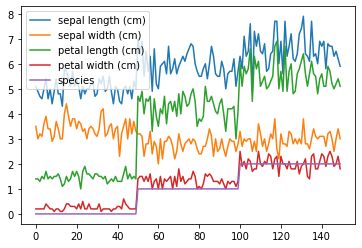

In [61]:
df.plot()

**Que tal um scatter plot com duas variáveis?**

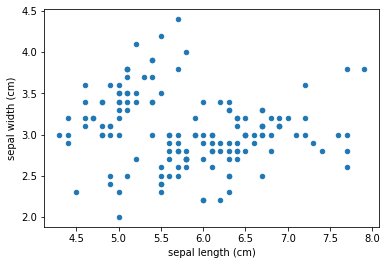

In [62]:
df.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

**E mesmo gráficos mais complexos, como um gráfico de área, podem ser criados:**

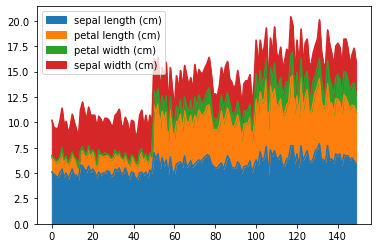

In [64]:
columns = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']
df[columns].plot.area();

A lista de possibilidades é imensa. Aqui tem muitos outros exemplos:

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## **Dica 19: Gráficos com Pandas em Operações de Agregação**

Uma outra vantagem dos gráficos com Pandas é que podemos em uma única operação agregar e sumarizar dados e então visualizar o resultado através de gráficos. Observe os exemplos.

**Vamos começar importando o dataset iris do Scikit-learn**

In [65]:
from sklearn.datasets import load_iris
data = load_iris()

**E então carregamos o dataset iris como dataframe do Pandas**

In [66]:
import pandas as pd
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['species'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


**Calculamos a média das colunas agrupando pela coluna species e criamos um gráfico de barras com o resultado**

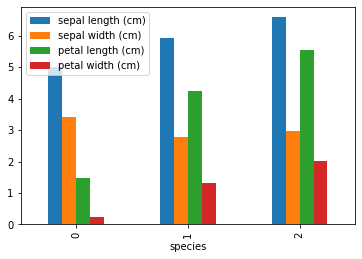

In [68]:
df.groupby('species').mean().plot.bar();

**Ou então, fazemos a contagem de classes da coluna species e plotamos em um gráfico de pizza**

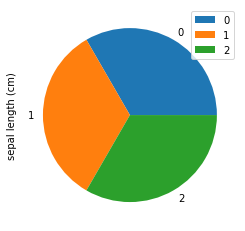

In [69]:
df.groupby('species').count().plot.pie(y = 'sepal length (cm)');

## **Dica 20: Gráficos Estatísticos com Pandas**

E para concluir a série sobre Pandas, alguns gráficos estatísticos que podem ser criados diretamente de um dataframe Pandas.

**Vamos começar importando o dataset iris do Scikit-learn**


In [70]:
from sklearn.datasets import load_iris
data = load_iris()

**E então carregamos o dataset iris como dataframe do Pandas**

In [71]:
import pandas as pd
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['species'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


**Gráfico KDE (Kernel Density Function) para cada variável do dataframe**

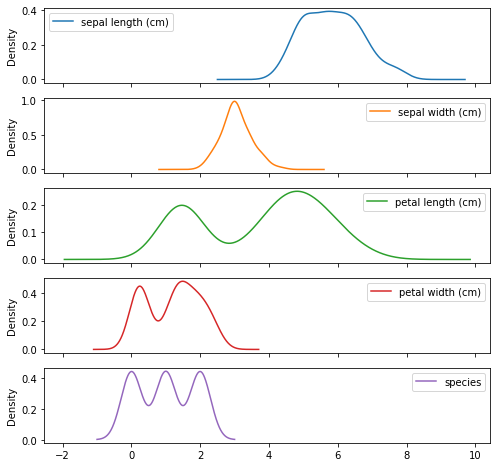

In [73]:
df.plot.kde(subplots = True, figsize = (8,8));

**Boxplot de cada variável**

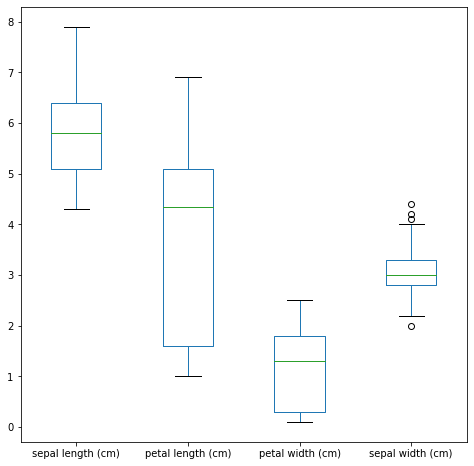

In [74]:
columns = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']
df[columns].plot.box(figsize = (8,8));

E assim concluímos esta série especial. O Pandas é uma verdadeira caixa de ferramentas para manipulação de dados!